# Plot Stream Triad Bandwidths

Generates a plot of the stream triad bandwidths for Raspberry Pi.  Just for fun.

Maybe someday these can be embedded into the web

In [1]:
%matplotlib inline

In [2]:
import sys
import yaml
import math

import matplotlib
import matplotlib.pyplot
import pandas

sys.path.append('..')
import limeleadlib.benchmarks

In [3]:
result = {}
d = yaml.load(open('../content/data/benchmarks/arm_processors.yaml', 'r'), Loader=yaml.SafeLoader)
d = limeleadlib.benchmarks.flatten_results(d)
for val in d:
    if 'stream_triad_mbs' in val:
        # key = val['model'].lower().replace(' ', '_')
        key = val['model']
        ncore = val['cores_used']
        mbs = float(val['stream_triad_mbs'])
        
        if ncore not in result:
            result[ncore] = {}
        result[ncore][key] = mbs

In [4]:
df = pandas.DataFrame.from_dict(result, orient='index')

df

,Raspberry Pi 3,Raspberry Pi 4
1,1595.6,4800.4
2,1602.4,4320.9
4,1594.7,3749.8
3,NaN,4004.3


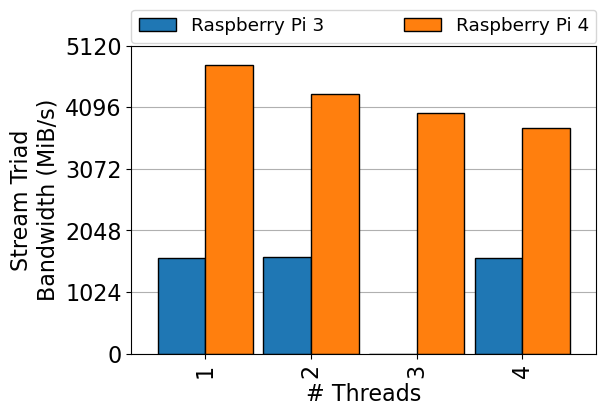

In [5]:
fig, ax = matplotlib.pyplot.subplots()

df.sort_index().plot.bar(ax=ax, width=0.9, edgecolor='black')
ax.set_ylabel("Stream Triad\nBandwidth (MiB/s)")
ax.set_xlabel("# Threads")
#ax.set_title("Stream Triad Results")
ax.yaxis.grid()
ax.set_axisbelow(True)

ymax = ax.get_ylim()[-1]
ystep = int(math.log(ymax, 10))
ystep = int(ystep / 3 * 10)
ystep = 2 ** ystep

yticks = []
while not yticks or yticks[-1] < ymax:
    yticks.append(len(yticks) * ystep)

ax.set_ylim(yticks[0], yticks[-1])
ax.set_yticks(yticks)

ax.legend(ncol=2, bbox_to_anchor=(0, 1.01, 1, 0), loc='lower left', mode='expand', borderaxespad=0, fontsize='small')